In [14]:
#Loading Dependencies 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)


In [4]:
#Importing DATA
data = pd.read_csv('data_exercise_40.csv')
data.head()

,Unnamed: 0,DailyTotalSleepMins1,DailyTotalSleepMins2,DailyTotalSleepMins3,DailyTotalSleepMins4,DailyTotalSleepMins5,DailyTotalSleepMins6,DailyTotalSleepMins7,DailyLightSleepMins1,DailyLightSleepMins2,...,DailySedentaryAct1,DailySedentaryAct2,DailySedentaryAct3,DailySedentaryAct4,DailySedentaryAct5,DailySedentaryAct6,DailySedentaryAct7,_24_Weekly_Exercise_Score,ID,label
0,0,378.000000,358.0,378.0,386.0,408.0,420.0,255.000000,249.000000,226.0,...,1223.0,1245.0,1182.0,1224.0,1270.0,1268.0,1269.0,15.0,1000,4
1,1,408.000000,295.0,361.0,387.0,330.0,284.0,300.000000,223.000000,172.0,...,1219.0,1188.0,1126.0,1204.0,1221.0,1232.0,1121.0,15.0,1000,4
2,2,397.000000,379.0,345.0,369.0,312.0,319.0,293.000000,237.000000,238.0,...,1225.0,1137.0,1152.0,1211.0,1174.0,1185.0,1239.0,15.0,1000,4
3,3,357.000000,313.0,213.0,331.0,344.0,345.0,283.142857,197.000000,182.0,...,1223.0,1231.0,1260.0,1133.0,1247.0,1300.0,1437.0,15.0,1000,4
4,4,381.285714,369.0,382.0,332.0,405.0,418.0,218.000000,221.428571,200.0,...,1323.0,1246.0,1213.0,1210.0,1175.0,1249.0,1239.0,0.0,1000,1


In [5]:
#PreProcessing
data1 = pd.read_csv('data_exercise_40.csv', usecols = range(1,120), header = 0)
data1.fillna(data1.mean(), inplace = True)
data1.head()

,DailyTotalSleepMins1,DailyTotalSleepMins2,DailyTotalSleepMins3,DailyTotalSleepMins4,DailyTotalSleepMins5,DailyTotalSleepMins6,DailyTotalSleepMins7,DailyLightSleepMins1,DailyLightSleepMins2,DailyLightSleepMins3,...,DailyWakeMins5,DailyWakeMins6,DailyWakeMins7,DailySedentaryAct1,DailySedentaryAct2,DailySedentaryAct3,DailySedentaryAct4,DailySedentaryAct5,DailySedentaryAct6,DailySedentaryAct7
0,378.000000,358.0,378.0,386.0,408.0,420.0,255.000000,249.000000,226.0,209.0,...,24.0,33.0,13.000000,1223.0,1245.0,1182.0,1224.0,1270.0,1268.0,1269.0
1,408.000000,295.0,361.0,387.0,330.0,284.0,300.000000,223.000000,172.0,233.0,...,12.0,21.0,7.000000,1219.0,1188.0,1126.0,1204.0,1221.0,1232.0,1121.0
2,397.000000,379.0,345.0,369.0,312.0,319.0,293.000000,237.000000,238.0,182.0,...,33.0,9.0,28.000000,1225.0,1137.0,1152.0,1211.0,1174.0,1185.0,1239.0
3,357.000000,313.0,213.0,331.0,344.0,345.0,283.142857,197.000000,182.0,150.0,...,35.0,19.0,17.333333,1223.0,1231.0,1260.0,1133.0,1247.0,1300.0,1437.0
4,381.285714,369.0,382.0,332.0,405.0,418.0,218.000000,221.428571,200.0,213.0,...,23.0,22.0,17.333333,1323.0,1246.0,1213.0,1210.0,1175.0,1249.0,1239.0


In [6]:
data1.describe()

,DailyTotalSleepMins1,DailyTotalSleepMins2,DailyTotalSleepMins3,DailyTotalSleepMins4,DailyTotalSleepMins5,DailyTotalSleepMins6,DailyTotalSleepMins7,DailyLightSleepMins1,DailyLightSleepMins2,DailyLightSleepMins3,...,DailyWakeMins5,DailyWakeMins6,DailyWakeMins7,DailySedentaryAct1,DailySedentaryAct2,DailySedentaryAct3,DailySedentaryAct4,DailySedentaryAct5,DailySedentaryAct6,DailySedentaryAct7
count,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,...,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000
mean,448.477921,442.404197,441.735722,435.966791,445.181413,445.301112,445.138931,261.094226,262.545657,261.562981,...,23.881846,23.790021,24.041621,1198.064376,1200.039480,1199.100971,1195.994185,1198.888248,1200.162552,1200.100136
std,125.617936,130.175313,131.263224,128.336560,126.870640,127.137705,124.919892,74.506850,71.192204,75.365298,...,14.148636,14.319583,14.325310,123.937086,122.907934,126.013788,125.419588,125.362359,122.929978,123.577440
min,20.000000,9.000000,20.000000,3.000000,12.000000,19.000000,10.000000,2.000000,4.000000,9.000000,...,1.000000,1.000000,1.000000,37.000000,630.000000,653.000000,587.000000,664.000000,421.000000,145.000000
25%,381.142857,378.000000,371.000000,368.000000,376.357143,374.000000,376.500000,212.000000,215.000000,209.000000,...,14.000000,14.000000,14.000000,1127.000000,1128.000000,1123.500000,1120.000000,1124.500000,1128.000000,1129.562500
50%,455.000000,449.000000,448.000000,445.000000,451.000000,450.000000,449.000000,259.333333,262.500000,259.888889,...,21.750000,21.000000,22.000000,1203.000000,1211.000000,1209.000000,1199.000000,1207.000000,1210.000000,1208.000000
75%,520.000000,513.000000,515.200000,511.000000,516.500000,516.900000,514.000000,304.000000,304.000000,306.000000,...,31.000000,30.000000,31.000000,1277.000000,1284.000000,1284.000000,1279.000000,1281.000000,1280.000000,1282.000000
max,1025.000000,1135.000000,1082.000000,1159.000000,1072.000000,1090.000000,1080.000000,670.000000,649.000000,768.000000,...,96.000000,132.000000,125.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000


In [7]:
s1 = pd.read_csv('data_exercise_40.csv', usecols = range(120,121) , header = 0)
s1.head()

,_24_Weekly_Exercise_Score
0,15.0
1,15.0
2,15.0
3,15.0
4,0.0


In [8]:
#Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(data1, s1, test_size = .3, random_state = 109)
print("X_train size ==>", X_train.shape)
print("y_train size ==>", y_train.shape)
print("X_test size ==>", X_test.shape)
print("y_test size ==>", y_test.shape)

X_train size ==> (1707, 119)
y_train size ==> (1707, 1)
X_test size ==> (732, 119)
y_test size ==> (732, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [10]:
#Create SVM Classifier
clf = svm.SVC(kernel = 'linear')
#Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())
#Predict the response for the test dataset
y_pred = clf.predict(X_test)
print(y_pred)

#Evaluate the model
print(classification_report(y_test, y_pred))

#Model Accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
#Model Precision
print('Precision:', metrics.precision_score(y_test, y_pred))
#Model Recall
print('Recall:', metrics.recall_score(y_test, y_pred))

[116.  35.   0.   5.   0.   5.   0.  25.   5.  15.  15.   0. 100.  20.
  85.   0.   0.   5.   0.   0.   0.   0.   0.  15.   0.  15.   5.  25.
  15.   0.   0.  25.  15.   0.  65.  30. 116.   0.  65.  75.   0.  85.
   0.   0.  25.  30.  25.  15.   0.   0.   0.   5.  15.   0.  50.   0.
  15.  40.   0.   0.   0.  25.   0.  15.   0.  75.   0.   0.  30.  50.
   0.  15.   0.  30.  50.  30.  75.  15.  65.   0.   0.  30.  30.   0.
  25.   5.   5.  55.  15.   5.  15.  50.   5.  15.   0.  20.  30.   0.
   0.   5.   0.  30.   0. 116. 100.  30.  75.   0.   0.  40.   0.  50.
  15.   0.   0.  50. 116.   0.   0.   0.  50.  30.  25.   0.  30.   0.
  15.   0.   0.  10.  85.   0.   0.   0.  10.  10.  75.  30. 100.   0.
   0.  20.  50.  75.  30.  15.   0.   0.   0.  25.  30.   0.   5.   0.
  55.   0.  55.   0.  55.  30.  15.   5.  30.  30.   0.  10.   0.  20.
   0.  50.   0.  50.  40.   0.  75.   5.  30.   0.  75.   0.   0.   5.
  25.  10.  55.  15.   0.   0.  40.  15.  40.  10.  20.   0.  45.   0.
   0. 

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

kappa score:   0.10771415373560755


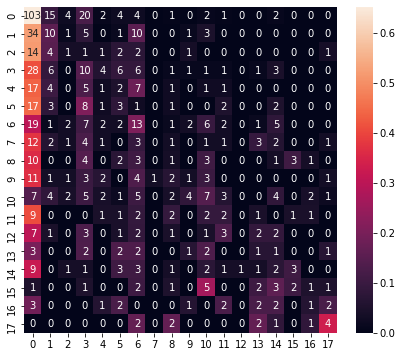

In [15]:
 predictions = [round(value) for value in y_pred]

cm = confusion_matrix(y_test, predictions)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g')

plot_confusion_matrix(cm)

print( "kappa score:  ", cohen_kappa_score(y_test, predictions))

In [ ]:
#Tuning Hyperparamters
X_train, X_test, y_train, y_test = train_test_split(data1, s1, test_size = .3, random_state = 32)

kernel = ['linear', 'rbf', 'poly', 'sigmoid']
for i in kernel:
    model = SVC(kernel = i, C = 1.0)
    model.fit(X_train, y_train.values.ravel())
    print('For kernel:', i)
    print('accuracy is:', model.score(X_test, y_test))

model = SVC()
model.fit(X_train, y_train)
print('Accuracy on testing data is:', model.score(X_test, y_test))
print('Accuracy on training data is:', model.score(X_train, y_train))

for i in rnge(1,10):
    model = SVC(kernel = 'poly', degree = i, C=100)
    model.fit(X_train, y_train)
    print('Accuracy on testing data is: \t', model.score(X_test, y_test))
    print('Accuracy on training data is: \t', model.score(X_train, y_train))
    
param_grid = {'C':[0.1,1,100,1000], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1,2,3,4,5,6]}
grid = GridDearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.score(X_test, y_test))
